In [1]:
import sys
import os
import pandas as pd
import pickle
import networkx as nx

sys.path.append(os.path.abspath('..'))

from src.features.structural_alg import get_approx_betweenness

In [2]:
with open("../data/processed/amazon_graph.pickle", "rb") as f:
    G = pickle.load(f)

In [3]:
# Analyze the largest weakly connected component (i.e. G)
print(nx.is_weakly_connected(G))

# Get the diameter of G which is weakly connected
print("Diameter of G = ", nx.approximation.diameter(G.to_undirected()))

True
Diameter of G =  47


In [4]:
# Compute approximate betweenness centrality
K_SAMPLES = 1000 
SEED = 42

In [5]:
# Using NetworkX function
nx_approx_betweenness = nx.betweenness_centrality(G, k=K_SAMPLES, seed=SEED, normalized=True, endpoints=False)

In [6]:
# Save results

df_bet_nx = pd.DataFrame(list(nx_approx_betweenness.items()), columns=['ASIN', 'Betweenness'])
display(df_bet_nx.head(5))
# Save to CSV
df_bet_nx.to_csv("../data/processed/bet_scores_nx.csv", index=False)
# Now you can use the scores
print(f"Computed bet cent for {len(nx_approx_betweenness)} nodes.")

,ASIN,Betweenness
0,0827229534,5.321784e-05
1,0738700797,6.280808e-09
2,0842328327,0.000000e+00
3,1577943082,0.000000e+00
4,0486220125,0.000000e+00


Computed bet cent for 334843 nodes.


In [7]:
# Using hand-made function
approx_betweenness = get_approx_betweenness(G, k=K_SAMPLES, seed=SEED)

No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
No path found between s and t, iteration:  0
s =  104248 , t =  285706 , #SPs =  0 , len SP =  0
------------------------------
No path found between s and t, iteration:  1
s =  219949 , t =  115574 , #SPs =  0 , len SP =  0
------------------------------
s =  235514 , t =  308944 , #SPs =  1 , len SP =  30
------------------------------
No path found between s and t, iteration:  3
s =  3407 , t =  83707 , #SPs =  0 , len SP =  0
------------------------------
No path found between s and t, iteration:  4
s =  221571 , t =  178389 , #SPs =  0 , 

In [8]:
# Save results

# Using hand-made function results
df_bet = pd.DataFrame(list(approx_betweenness.items()), columns=['ASIN', 'Betweenness'])
display(df_bet.head(5))
# Save to CSV
df_bet.to_csv("../data/processed/bet_scores.csv", index=False)

# Now you can use the scores
print(f"Computed bet cent for {len(approx_betweenness)} nodes.")

,ASIN,Betweenness
0,0827229534,0.0
1,0738700797,0.0
2,0842328327,0.0
3,1577943082,0.0
4,0486220125,0.0


Computed bet cent for 334843 nodes.


In [9]:
# top ten nodes by betweenness centrality
top_10 = df_bet_nx.nlargest(10, 'Betweenness')
print("Top 10 nodes by nx betweenness centrality:")
print(top_10)

# top ten nodes by betweenness centrality using hand-made function
top_10_test = df_bet.nlargest(10, 'Betweenness')  
print("Top 10 nodes by test betweenness centrality:")
print(top_10_test)

Top 10 nodes by nx betweenness centrality:
              ASIN  Betweenness
97639   0486295834     0.005509
91826   0486411214     0.005223
164167  1885767544     0.004513
271456  0226816273     0.003943
224097  078947994X     0.003902
301170  B000001FDV     0.003707
25929   B00006DEFA     0.003653
133002  B00005JKVA     0.003544
3298    0789468050     0.003451
76489   0140444270     0.003406
Top 10 nodes by test betweenness centrality:
              ASIN  Betweenness
152534  0321036638        0.006
102065  0374525641        0.005
188582  1586210467        0.005
206219  B0000047JL        0.005
325609  0764585819        0.005
332234  0790732211        0.005
3298    0789468050        0.004
13571   B00005MKM7        0.004
15408   0764585843        0.004
21993   B00008979A        0.004


Number of nodes with zero betweenness centrality (nx): 258480


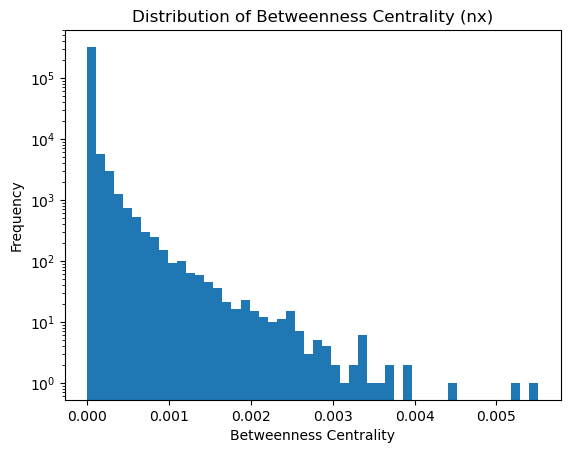

In [10]:
# Number of zero elements in betweenness centrality
zero_count = (df_bet_nx['Betweenness'] == 0.0).sum()
print(f"Number of nodes with zero betweenness centrality (nx): {zero_count}")

# Distribution of betweenness centrality values
import matplotlib.pyplot as plt
plt.hist(df_bet_nx['Betweenness'], bins=50)
plt.title('Distribution of Betweenness Centrality (nx)')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

Number of nodes with zero betweenness centrality (test): 330360


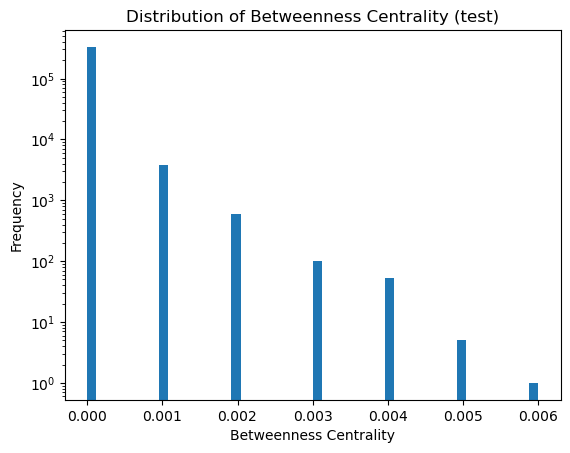

In [11]:
# Number of zero elements in betweenness centrality using hand-made function
zero_count_test = (df_bet['Betweenness'] == 0.0).sum()
print(f"Number of nodes with zero betweenness centrality (test): {zero_count_test}")

# Distribution of betweenness centrality values using hand-made function
plt.hist(df_bet['Betweenness'], bins=50)
plt.title('Distribution of Betweenness Centrality (test)')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()